In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
df= pd.read_csv("/Users/wl/Desktop/UCB/Data X/Project/Datasets/common_companies.csv",index_col=0,encoding = "latin1")
df.head()

,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,EducationFlag,DegreeType,EliteFlag,Dummy1,Dummy2,Dummy3,Dummy4,Layoff Date,Company Name,Employees Affected
1,808a3ae7-b1ec-31f0-9335-8f49e4e10a40,1988,0,Web Development,0.919146,Software Engineering,0.068156,Los Angeles,United States,5,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.54E+12,2/1/2017,Symantec Corporation,87.0
2,1fe596b8-87d0-3118-ab5e-375485b477e9,1984,0,Mobile Telecommunications,0.571192,Business Development,0.260968,Mountain View,United States,5,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.53E+12,7/22/2015,"Cisco Systems, Inc.",192.0
3,43d4f687-4de8-39e0-91f4-ed90ba1e2862,1967,2,Human Resources,0.264015,Human Resources,0.205493,San Francisco,United States,4,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.54E+12,10/10/2014,"Cisco Systems, Inc.",1005.0
4,6870e27a-1eb0-3be6-8878-43b3adc611cc,1964,0,Web Design,0.428620,Digital Marketing,0.313889,San Jose,United States,4,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.54E+12,6/10/2016,Symantec Corporation,15.0
5,8da0eaa5-8d1a-3360-986d-4ab1f5658930,1992,2,Software Engineering,0.704756,Web Development,0.284496,New York,United States,4,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.54E+12,7/22/2015,"Cisco Systems, Inc.",192.0


In [2]:
encodeSkill1 = pd.get_dummies(df['Skillset1'], prefix = 's1', prefix_sep='-')
encodeSkill2 = pd.get_dummies(df['Skillset2'], prefix = 's2', prefix_sep='-')
merged=pd.concat([df[['Skillset1','Skillset1 Weight','Skillset2','Skillset2 Weight','Length','Company Name']],
                   encodeSkill1,encodeSkill2],axis=1)
merged.head()

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
1,Web Development,0.919146,Software Engineering,0.068156,366,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Mobile Telecommunications,0.571192,Business Development,0.260968,61,"Cisco Systems, Inc.",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Human Resources,0.264015,Human Resources,0.205493,457,"Cisco Systems, Inc.",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Web Design,0.428620,Digital Marketing,0.313889,366,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Software Engineering,0.704756,Web Development,0.284496,699,"Cisco Systems, Inc.",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Filter the company SymantecCorp
df_SymantecCorp=merged[merged['Company Name']=='Symantec Corporation']
df_SymantecCorp.head()

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
1,Web Development,0.919146,Software Engineering,0.068156,366,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Web Design,0.428620,Digital Marketing,0.313889,366,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,Legal,0.976399,Military,0.023494,365,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,IT Management and Support,0.991784,Software Engineering,0.004533,5235,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38,Software Engineering,0.742009,Mobile Telecommunications,0.145718,212,Symantec Corporation,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_SymantecCorp.shape

(816, 70)

In [5]:
# Filter the s1-Administration skill set
df_SymantecCorp_Admin=df_SymantecCorp[df_SymantecCorp['s1-Administration']==1]
df_SymantecCorp_Admin.head()

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
48,Administration,0.304132,Business Development,0.140788,213,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,Administration,0.238799,Digital Marketing,0.231789,92,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,Administration,0.551578,Finance,0.137163,152,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,Administration,0.323257,Sales,0.186288,335,Symantec Corporation,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
341,Administration,0.481967,Finance,0.136567,120,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_SymantecCorp_Admin.shape

(63, 70)

In [7]:
# Sort Skillset2
df_SymantecCorp_Admin.sort_values(by=['Skillset2'])

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
6783,Administration,0.579503,Administration,0.155384,1612,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2377,Administration,0.349897,Administration,0.332667,181,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,Administration,0.613241,Administration,0.206760,883,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1864,Administration,0.255670,Administration,0.133202,61,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5163,Administration,0.227440,Administration,0.140136,549,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5106,Administration,0.596149,Administration,0.247390,518,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2368,Administration,0.214542,Administration,0.179902,2404,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4474,Administration,0.377370,Administration,0.244572,1126,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,Administration,0.304132,Business Development,0.140788,213,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2897,Administration,0.368307,Business Development,0.292243,519,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check if there is any null value to prepare for building linear regression model
df_SymantecCorp_Admin.isnull().sum()

Skillset1                                  0
Skillset1 Weight                           0
Skillset2                                  0
Skillset2 Weight                           0
Length                                     0
Company Name                               0
s1-Administration                          0
s1-Business Development                    0
s1-Data Analysis                           0
s1-Design                                  0
s1-Digital Marketing                       0
s1-Electrical Engineering                  0
s1-Energy, Oil, and Gas                    0
s1-Finance                                 0
s1-Healthcare                              0
s1-Hospitality                             0
s1-Human Resources                         0
s1-IT Management and Support               0
s1-Industrial Management                   0
s1-Insurance                               0
s1-Legal                                   0
s1-Logistics                               0
s1-Manufac

In [9]:
# Linear regression
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = df_SymantecCorp_Admin['Length']
X = df_SymantecCorp_Admin.drop(['Skillset1','Skillset1 Weight','Skillset2','Skillset2 Weight','Length',
                                'Company Name','s1-Administration'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

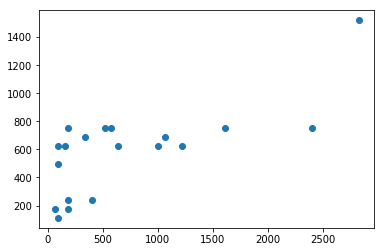

In [10]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

In [11]:
# Divide the length by 365 to make it year-based
df_SymantecCorp_Admin.loc[:,'Length'] = df_SymantecCorp_Admin.loc[:,'Length']*0.00273973

/Users/wl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
df_SymantecCorp_Admin.head()

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
48,Administration,0.304132,Business Development,0.140788,0.583562,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,Administration,0.238799,Digital Marketing,0.231789,0.252055,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,Administration,0.551578,Finance,0.137163,0.416439,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,Administration,0.323257,Sales,0.186288,0.917810,Symantec Corporation,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
341,Administration,0.481967,Finance,0.136567,0.328768,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
df_SymantecCorp_Admin['Length group']=pd.cut(df_SymantecCorp_Admin['Length'], bins=[0, 0.5, 1, 1.5,2,10000], 
                                             include_lowest=True, 
                                             labels=[1,2,3,4,5])

/Users/wl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
df_SymantecCorp_Admin.head()

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development,Length group
48,Administration,0.304132,Business Development,0.140788,0.583562,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
54,Administration,0.238799,Digital Marketing,0.231789,0.252055,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141,Administration,0.551578,Finance,0.137163,0.416439,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
285,Administration,0.323257,Sales,0.186288,0.917810,Symantec Corporation,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2
341,Administration,0.481967,Finance,0.136567,0.328768,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
df_SymantecCorp_Admin['Length group'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

In [16]:
# Create a new column that converts the length group from category to integer
# Categorical values cannot be used to build models
df_SymantecCorp_Admin["Length group int"] = df_SymantecCorp_Admin["Length group"].astype('int')

/Users/wl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_SymantecCorp_Admin.head()

,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,Length,Company Name,s1-Administration,s1-Business Development,s1-Data Analysis,s1-Design,...,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development,Length group,Length group int
48,Administration,0.304132,Business Development,0.140788,0.583562,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,2,2
54,Administration,0.238799,Digital Marketing,0.231789,0.252055,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
141,Administration,0.551578,Finance,0.137163,0.416439,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
285,Administration,0.323257,Sales,0.186288,0.917810,Symantec Corporation,1,0,0,0,...,0,0,1,0,0,0,0,0,2,2
341,Administration,0.481967,Finance,0.136567,0.328768,Symantec Corporation,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [18]:
df_SymantecCorp_Admin['Length group int'].dtype

dtype('int64')

In [19]:
# train test set split
y = df_SymantecCorp_Admin['Length group int']
x = df_SymantecCorp_Admin.drop(['Skillset1','Skillset1 Weight','Skillset2','Skillset2 Weight','Length',
                                'Length group','Length group int','Company Name','s1-Administration'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100) 
random_forest.fit(x_train,y_train)
random_forest_train_acc = round(random_forest.score(x_train,y_train)*100,2) 
random_forest_test_acc = round(random_forest.score(x_test,y_test)*100,2) 
print('Default setting:')
print('random_forest training acuracy= ',random_forest_train_acc,'%') 
print('random_forest test accuracy= ',random_forest_test_acc,'%')

Default setting:
random_forest training acuracy=  56.82 %
random_forest test accuracy=  42.11 %


In [21]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_train_acc = round(logreg.score(x_train,y_train)*100,2) 
logreg_test_acc = round(logreg.score(x_test,y_test)*100,2) 
print('Default setting:')
print ('logreg training acuracy= ',logreg_train_acc,'%')
print('logreg test accuracy= ',logreg_test_acc,'%')

Default setting:
logreg training acuracy=  56.82 %
logreg test accuracy=  42.11 %


/Users/wl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train,y_train)
perceptron_train_acc = round(perceptron.score(x_train,y_train)*100,2) 
perceptron_test_acc = round(perceptron.score(x_test,y_test)*100,2) 
print('Default setting:')
print ('perceptron training acuracy= ',perceptron_train_acc,'%')
print('perceptron test accuracy= ',perceptron_test_acc,'%')

Default setting:
perceptron training acuracy=  38.64 %
perceptron test accuracy=  42.11 %


/Users/wl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
